In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt

C:\Users\91867\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [121]:
start = '2023-01-30'
end = '2024-01-30'
stock = 'TCS.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [122]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30,3420.000000,3458.449951,3385.550049,3433.649902,3375.049561,1953798
2023-01-31,3449.000000,3449.000000,3351.000000,3358.699951,3301.379150,2820375
2023-02-01,3363.000000,3419.000000,3355.000000,3408.350098,3350.181396,2205161
2023-02-02,3427.000000,3469.000000,3420.100098,3460.399902,3401.343018,1813847
2023-02-03,3504.000000,3504.000000,3452.899902,3482.300049,3422.869629,1804469
2023-02-06,3473.149902,3473.149902,3436.850098,3459.949951,3400.900879,1138714
2023-02-07,3468.899902,3493.000000,3461.399902,3472.550049,3413.285889,1455647
2023-02-08,3478.050049,3539.899902,3478.050049,3520.100098,3460.024414,1986946
2023-02-09,3515.000000,3547.600098,3505.300049,3540.850098,3480.420410,1655427


In [123]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-15,3960.000000,3965.000000,3885.000000,3903.800049,3885.794434,2801505
2024-01-16,3899.000000,3899.000000,3855.550049,3861.300049,3843.490479,1432672
2024-01-17,3819.000000,3909.949951,3812.550049,3884.600098,3866.683105,3458696
2024-01-18,3898.000000,3908.800049,3862.000000,3902.600098,3884.600098,2239110
2024-01-19,3945.000000,3963.550049,3915.050049,3943.050049,3943.050049,2941975
2024-01-22,3943.050049,3943.050049,3943.050049,3943.050049,3943.050049,0
2024-01-23,3900.000000,3933.899902,3842.750000,3858.250000,3858.250000,2618854
2024-01-24,3880.000000,3883.649902,3805.600098,3841.800049,3841.800049,2657709
2024-01-25,3839.899902,3861.000000,3778.699951,3810.300049,3810.300049,2205154


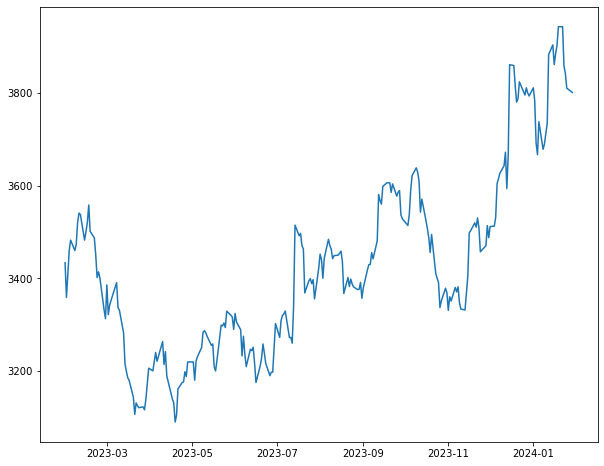

In [124]:
plt.figure(figsize=(10,8))
plt.plot(data['Close'], label='Closing Price')

In [125]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
X = data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2023-01-30,-13.649902,72.899902
2023-01-31,90.300049,98.000000
2023-02-01,-45.350098,64.000000
2023-02-02,-33.399902,48.899902
2023-02-03,21.699951,51.100098


In [126]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [127]:
Y

array([-1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1,  1

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state = 44)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [130]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn= neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params, cv=5)

model.fit(x_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

In [131]:
print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.71
Test_data Accuracy: 0.47


In [132]:
y= data['Close']

In [133]:
y


Date
2023-01-30    3433.649902
2023-01-31    3358.699951
2023-02-01    3408.350098
2023-02-02    3460.399902
2023-02-03    3482.300049
                 ...     
2024-01-22    3943.050049
2024-01-23    3858.250000
2024-01-24    3841.800049
2024-01-25    3810.300049
2024-01-29    3801.000000
Name: Close, Length: 246, dtype: float64

In [134]:
predictions_classification = model.predict(x_test) 
  

In [135]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, ' Predicted Class':predictions_classification})
actual_predicted_data.head(10)  

,Actual Class,Predicted Class
0,1,-1
1,-1,-1
2,-1,1
3,1,1
4,1,1
5,1,1
6,1,-1
7,1,-1
8,1,-1
9,-1,1


In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg,x_test_reg,y_train_reg,y_test_reg=train_test_split(X,y,test_size=0.25, random_state=44)
params= {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg= neighbors.KNeighborsRegressor()
model_reg= GridSearchCV(knn_reg, params,cv=5)
model_reg.fit(x_train_reg, y_train_reg)
predictions=model_reg.predict(x_test_reg)

In [137]:
print(predictions)

[3367.51249186 3366.82082113 3362.30415853 3415.6541748  3459.17915853
 3299.78747559 3411.5166626  3299.15415446 3454.83337402 3553.18332926
 3356.77498372 3367.51249186 3379.52081299 3458.73750814 3445.15415446
 3439.42500814 3440.2208252  3541.52502441 3400.0958252  3500.09999593
 3366.77498372 3288.44999186 3340.32914225 3474.87084961 3488.02500407
 3459.60416667 3384.72084554 3427.12502035 3435.5958252  3444.55834961
 3344.65419515 3461.72916667 3523.57497152 3486.70001221 3323.53747559
 3444.55834961 3480.12917074 3470.90002441 3485.02915446 3386.0916748
 3439.49580892 3342.2041626  3510.11669922 3446.18332926 3469.12497965
 3384.48748779 3475.74580892 3370.52915446 3562.47501628 3448.4708252
 3517.31669108 3459.60416667 3349.38334147 3400.19165039 3427.54585775
 3388.17502848 3517.28330485 3491.01668294 3383.66662598 3501.70831299
 3500.51251221 3408.26249186]


In [138]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2))) 

In [139]:
 rms

3429.9901035768335

In [140]:
valid= pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close Value': predictions})

In [141]:
valid.head(10)

,Actual Close,Predicted Close Value
Date,,
2023-10-27,3350.949951,3367.512492
2023-12-28,3799.899902,3366.820821
2023-10-10,3628.899902,3362.304159
2024-01-04,3666.800049,3415.654175
2023-02-08,3520.100098,3459.179159
2023-05-19,3222.850098,3299.787476
2023-04-03,3200.000000,3411.516663
2023-07-06,3322.899902,3299.154154
2023-09-14,3560.050049,3454.833374
